# Parte 2 - Experimentção

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A implementação do algoritmo de treinamento do Perceptron usado para resolver a parte 1 está na pasta src cujo aqruivo python foi chamado de Peceptron_general.py. Sendo, portanto, o mesmo algoritmo usado na parte 1.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron_general import Perceptron_general

## Execução das configurações


### Cada configuração é executada 100 vezes

In [6]:
executions_number = 100 

### Configuração 1.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

#### Inicialização do Perceptron

In [7]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [10]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config1_epochs_mean = np.round(np.mean(epochs_array), 4)
config1_epochs_sd = np.round(np.std(epochs_array), 4)
config1_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config1_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config1_epochs_mean, " Desvio Padrão: ", config1_epochs_sd)
print("Ajustes. Média: ", config1_adjusts_mean, " Desvio Padrão: ", config1_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  314
Quantidade de épocas:  17

Iteração número  2

Quantidade de ajustes:  273
Quantidade de épocas:  30

Iteração número  3

Quantidade de ajustes:  460
Quantidade de épocas:  8

Iteração número  4

Quantidade de ajustes:  357
Quantidade de épocas:  9

Iteração número  5

Quantidade de ajustes:  122
Quantidade de épocas:  18

Iteração número  6

Quantidade de ajustes:  276
Quantidade de épocas:  11

Iteração número  7

Quantidade de ajustes:  46
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  136
Quantidade de épocas:  4

Iteração número  9

Quantidade de ajustes:  376
Quantidade de épocas:  25

Iteração número  10

Quantidade de ajustes:  282
Quantidade de épocas:  7

Iteração número  11

Quantidade de ajustes:  239
Quantidade de épocas:  23

Iteração número  12

Quantidade de ajustes:  552
Quantidade de épocas:  21

Iteração número  13

Quantidade de ajustes:  167
Quantidade de épocas:  19

Iteração número  14

Quant

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [11]:
weights = perceptron.getWeights()
weights

array([20.9346, -8.4412, 88.0863])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [16]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

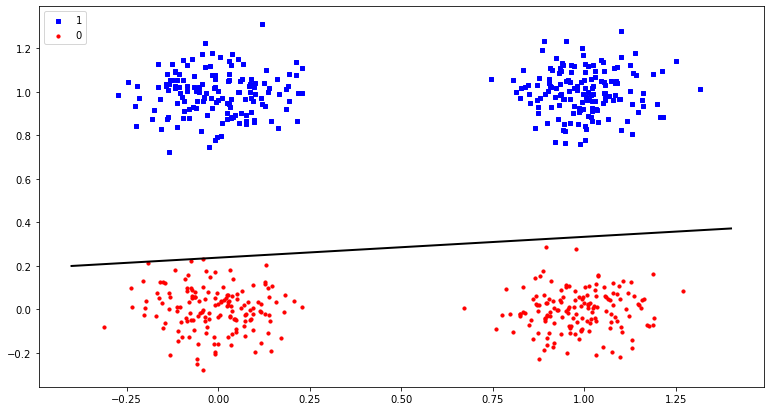

In [18]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 2.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [7]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [9]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-1.0, 1.0)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config2_epochs_mean = np.round(np.mean(epochs_array), 4)
config2_epochs_sd = np.round(np.std(epochs_array), 4)
config2_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config2_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config2_epochs_mean, " Desvio Padrão: ", config2_epochs_sd)
print("Ajustes. Média: ", config2_adjusts_mean, " Desvio Padrão: ", config2_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  18
Quantidade de épocas:  7

Iteração número  2

Quantidade de ajustes:  9
Quantidade de épocas:  4

Iteração número  3

Quantidade de ajustes:  10
Quantidade de épocas:  4

Iteração número  4

Quantidade de ajustes:  5
Quantidade de épocas:  3

Iteração número  5

Quantidade de ajustes:  10
Quantidade de épocas:  4

Iteração número  6

Quantidade de ajustes:  6
Quantidade de épocas:  4

Iteração número  7

Quantidade de ajustes:  12
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  6
Quantidade de épocas:  3

Iteração número  9

Quantidade de ajustes:  10
Quantidade de épocas:  5

Iteração número  10

Quantidade de ajustes:  14
Quantidade de épocas:  6

Iteração número  11

Quantidade de ajustes:  9
Quantidade de épocas:  4

Iteração número  12

Quantidade de ajustes:  11
Quantidade de épocas:  4

Iteração número  13

Quantidade de ajustes:  9
Quantidade de épocas:  3

Iteração número  14

Quantidade de ajustes:  14
Quan

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [10]:
weights = perceptron.getWeights()
weights

array([ 0.6854, -0.1656,  1.1849])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [11]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

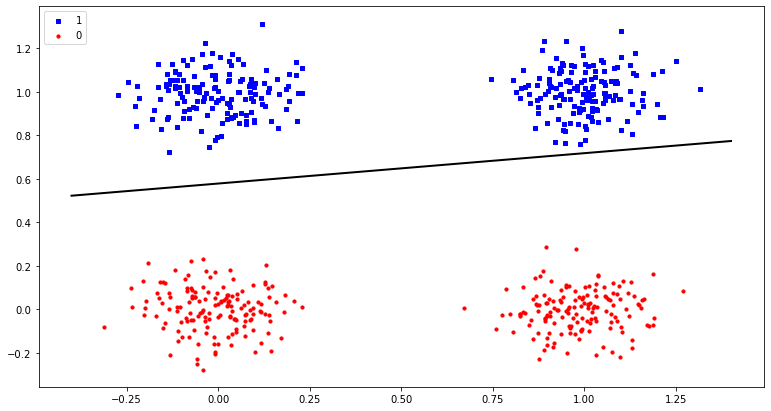

In [12]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 3.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [43]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [44]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-0.5, 0.5)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config3_epochs_mean = np.round(np.mean(epochs_array), 4)
config3_epochs_sd = np.round(np.std(epochs_array), 4)
config3_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config3_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config3_epochs_mean, " Desvio Padrão: ", config3_epochs_sd)
print("Ajustes. Média: ", config3_adjusts_mean, " Desvio Padrão: ", config3_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  5
Quantidade de épocas:  3

Iteração número  2

Quantidade de ajustes:  9
Quantidade de épocas:  5

Iteração número  3

Quantidade de ajustes:  6
Quantidade de épocas:  5

Iteração número  4

Quantidade de ajustes:  5
Quantidade de épocas:  3

Iteração número  5

Quantidade de ajustes:  10
Quantidade de épocas:  4

Iteração número  6

Quantidade de ajustes:  10
Quantidade de épocas:  4

Iteração número  7

Quantidade de ajustes:  8
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  14
Quantidade de épocas:  7

Iteração número  9

Quantidade de ajustes:  6
Quantidade de épocas:  3

Iteração número  10

Quantidade de ajustes:  6
Quantidade de épocas:  3

Iteração número  11

Quantidade de ajustes:  9
Quantidade de épocas:  5

Iteração número  12

Quantidade de ajustes:  3
Quantidade de épocas:  2

Iteração número  13

Quantidade de ajustes:  4
Quantidade de épocas:  3

Iteração número  14

Quantidade de ajustes:  13
Quantida

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [45]:
weights = perceptron.getWeights()
weights

array([ 0.4725, -0.0181,  1.0952])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [46]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

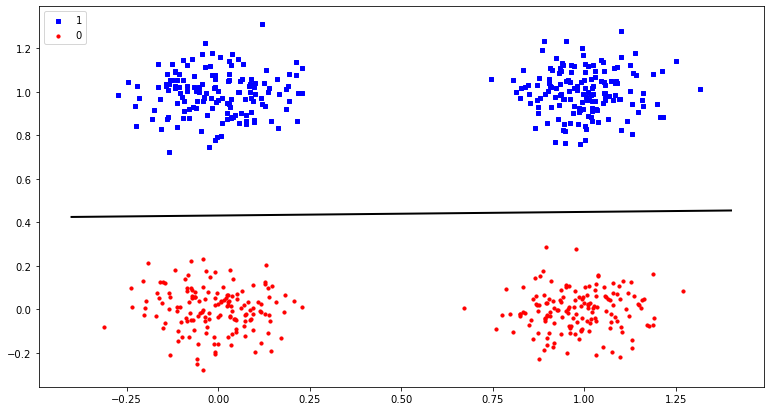

In [47]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 4.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [103]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [104]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config4_epochs_mean = np.round(np.mean(epochs_array), 4)
config4_epochs_sd = np.round(np.std(epochs_array), 4)
config4_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config4_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config4_epochs_mean, " Desvio Padrão: ", config4_epochs_sd)
print("Ajustes. Média: ", config4_adjusts_mean, " Desvio Padrão: ", config4_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  637
Quantidade de épocas:  32

Iteração número  2

Quantidade de ajustes:  993
Quantidade de épocas:  84

Iteração número  3

Quantidade de ajustes:  2273
Quantidade de épocas:  48

Iteração número  4

Quantidade de ajustes:  1461
Quantidade de épocas:  118

Iteração número  5

Quantidade de ajustes:  1799
Quantidade de épocas:  117

Iteração número  6

Quantidade de ajustes:  545
Quantidade de épocas:  15

Iteração número  7

Quantidade de ajustes:  392
Quantidade de épocas:  39

Iteração número  8

Quantidade de ajustes:  926
Quantidade de épocas:  33

Iteração número  9

Quantidade de ajustes:  614
Quantidade de épocas:  124

Iteração número  10

Quantidade de ajustes:  1814
Quantidade de épocas:  18

Iteração número  11

Quantidade de ajustes:  590
Quantidade de épocas:  52

Iteração número  12

Quantidade de ajustes:  103
Quantidade de épocas:  25

Iteração número  13

Quantidade de ajustes:  0
Quantidade de épocas:  1

Iteração número 

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [105]:
weights = perceptron.getWeights()
weights

array([5.6755, 3.298 , 8.6536])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [106]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

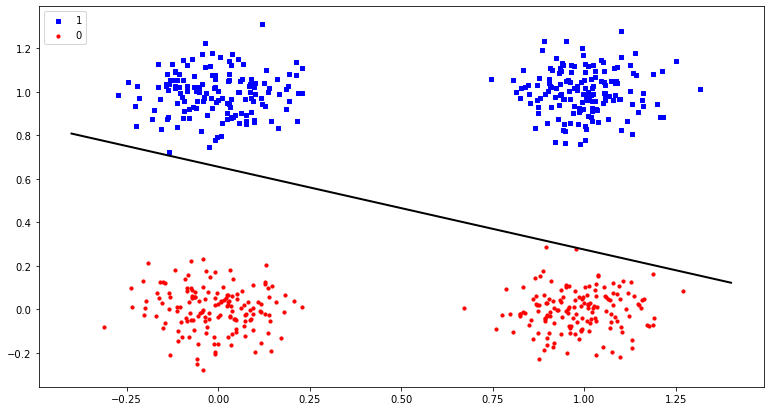

In [107]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 5.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [73]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [74]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-1, 1)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config5_epochs_mean = np.round(np.mean(epochs_array), 4)
config5_epochs_sd = np.round(np.std(epochs_array), 4)
config5_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config5_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config5_epochs_mean, " Desvio Padrão: ", config5_epochs_sd)
print("Ajustes. Média: ", config5_adjusts_mean, " Desvio Padrão: ", config5_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  26
Quantidade de épocas:  5

Iteração número  2

Quantidade de ajustes:  33
Quantidade de épocas:  6

Iteração número  3

Quantidade de ajustes:  12
Quantidade de épocas:  4

Iteração número  4

Quantidade de ajustes:  12
Quantidade de épocas:  3

Iteração número  5

Quantidade de ajustes:  5
Quantidade de épocas:  3

Iteração número  6

Quantidade de ajustes:  8
Quantidade de épocas:  3

Iteração número  7

Quantidade de ajustes:  32
Quantidade de épocas:  5

Iteração número  8

Quantidade de ajustes:  9
Quantidade de épocas:  3

Iteração número  9

Quantidade de ajustes:  31
Quantidade de épocas:  5

Iteração número  10

Quantidade de ajustes:  21
Quantidade de épocas:  4

Iteração número  11

Quantidade de ajustes:  26
Quantidade de épocas:  4

Iteração número  12

Quantidade de ajustes:  19
Quantidade de épocas:  4

Iteração número  13

Quantidade de ajustes:  8
Quantidade de épocas:  3

Iteração número  14

Quantidade de ajustes:  8
Qua

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [75]:
weights = perceptron.getWeights()
weights

array([ 0.1966, -0.0849,  0.3837])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [76]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

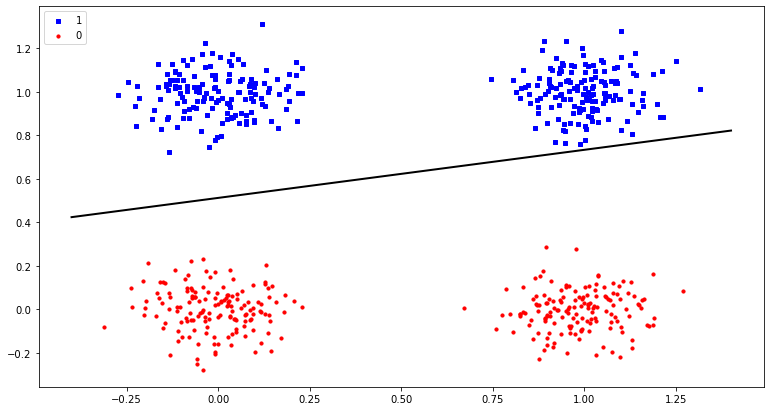

In [77]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 6.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [78]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [79]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-0.5, 0.5)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config6_epochs_mean = np.round(np.mean(epochs_array), 4)
config6_epochs_sd = np.round(np.std(epochs_array), 4)
config6_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config6_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config6_epochs_mean, " Desvio Padrão: ", config6_epochs_sd)
print("Ajustes. Média: ", config6_adjusts_mean, " Desvio Padrão: ", config6_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  10
Quantidade de épocas:  5

Iteração número  2

Quantidade de ajustes:  13
Quantidade de épocas:  4

Iteração número  3

Quantidade de ajustes:  14
Quantidade de épocas:  6

Iteração número  4

Quantidade de ajustes:  12
Quantidade de épocas:  3

Iteração número  5

Quantidade de ajustes:  4
Quantidade de épocas:  3

Iteração número  6

Quantidade de ajustes:  3
Quantidade de épocas:  3

Iteração número  7

Quantidade de ajustes:  5
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  5
Quantidade de épocas:  3

Iteração número  9

Quantidade de ajustes:  8
Quantidade de épocas:  4

Iteração número  10

Quantidade de ajustes:  13
Quantidade de épocas:  4

Iteração número  11

Quantidade de ajustes:  22
Quantidade de épocas:  6

Iteração número  12

Quantidade de ajustes:  1
Quantidade de épocas:  2

Iteração número  13

Quantidade de ajustes:  10
Quantidade de épocas:  4

Iteração número  14

Quantidade de ajustes:  1
Quant

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [80]:
weights = perceptron.getWeights()
weights

array([ 0.1133, -0.0089,  0.3617])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [81]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

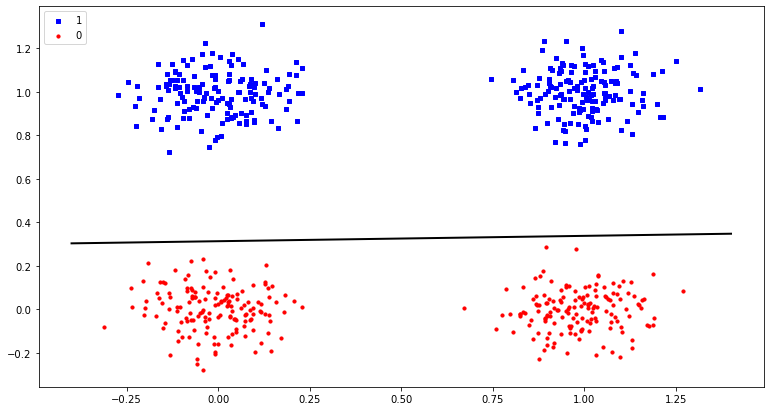

In [82]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 7.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [118]:
theta = 0.0
n = 0.01
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [119]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config7_epochs_mean = np.round(np.mean(epochs_array), 4)
config7_epochs_sd = np.round(np.std(epochs_array), 4)
config7_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config7_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config7_epochs_mean, " Desvio Padrão: ", config7_epochs_sd)
print("Ajustes. Média: ", config7_adjusts_mean, " Desvio Padrão: ", config7_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  7658
Quantidade de épocas:  1108

Iteração número  2

Quantidade de ajustes:  1744
Quantidade de épocas:  373

Iteração número  3

Quantidade de ajustes:  6155
Quantidade de épocas:  138

Iteração número  4

Quantidade de ajustes:  8823
Quantidade de épocas:  303

Iteração número  5

Quantidade de ajustes:  13436
Quantidade de épocas:  47

Iteração número  6

Quantidade de ajustes:  12098
Quantidade de épocas:  534

Iteração número  7

Quantidade de ajustes:  13006
Quantidade de épocas:  510

Iteração número  8

Quantidade de ajustes:  18677
Quantidade de épocas:  515

Iteração número  9

Quantidade de ajustes:  2826
Quantidade de épocas:  78

Iteração número  10

Quantidade de ajustes:  14732
Quantidade de épocas:  579

Iteração número  11

Quantidade de ajustes:  10818
Quantidade de épocas:  76

Iteração número  12

Quantidade de ajustes:  17905
Quantidade de épocas:  110

Iteração número  13

Quantidade de ajustes:  12228
Quantidade de ép

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [120]:
weights = perceptron.getWeights()
weights

array([18.7179, 11.1828, 27.9949])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [121]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

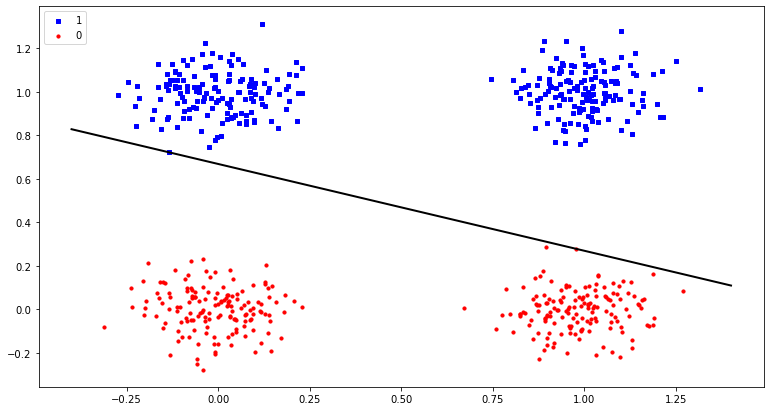

In [122]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 8.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [88]:
theta = 0.0
n = 0.01
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [89]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-1.0, 1.0)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config8_epochs_mean = np.round(np.mean(epochs_array), 4)
config8_epochs_sd = np.round(np.std(epochs_array), 4)
config8_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config8_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config8_epochs_mean, " Desvio Padrão: ", config8_epochs_sd)
print("Ajustes. Média: ", config8_adjusts_mean, " Desvio Padrão: ", config8_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  47
Quantidade de épocas:  12

Iteração número  2

Quantidade de ajustes:  27
Quantidade de épocas:  5

Iteração número  3

Quantidade de ajustes:  98
Quantidade de épocas:  10

Iteração número  4

Quantidade de ajustes:  97
Quantidade de épocas:  8

Iteração número  5

Quantidade de ajustes:  159
Quantidade de épocas:  6

Iteração número  6

Quantidade de ajustes:  8
Quantidade de épocas:  2

Iteração número  7

Quantidade de ajustes:  97
Quantidade de épocas:  7

Iteração número  8

Quantidade de ajustes:  126
Quantidade de épocas:  10

Iteração número  9

Quantidade de ajustes:  223
Quantidade de épocas:  6

Iteração número  10

Quantidade de ajustes:  15
Quantidade de épocas:  3

Iteração número  11

Quantidade de ajustes:  61
Quantidade de épocas:  2

Iteração número  12

Quantidade de ajustes:  78
Quantidade de épocas:  8

Iteração número  13

Quantidade de ajustes:  33
Quantidade de épocas:  10

Iteração número  14

Quantidade de ajust

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [90]:
weights = perceptron.getWeights()
weights

array([ 0.1177, -0.1594,  0.3804])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [91]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

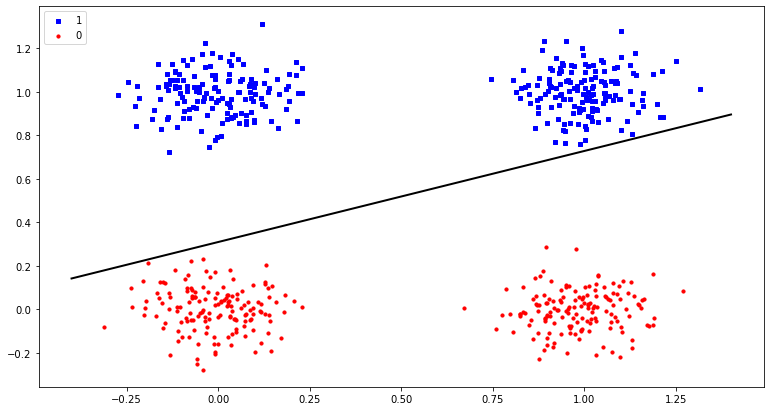

In [92]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 9.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [93]:
theta = 0.0
n = 0.01
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [94]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-0.5, 0.5)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config9_epochs_mean = np.round(np.mean(epochs_array), 4)
config9_epochs_sd = np.round(np.std(epochs_array), 4)
config9_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config9_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config9_epochs_mean, " Desvio Padrão: ", config9_epochs_sd)
print("Ajustes. Média: ", config9_adjusts_mean, " Desvio Padrão: ", config9_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  64
Quantidade de épocas:  5

Iteração número  2

Quantidade de ajustes:  157
Quantidade de épocas:  7

Iteração número  3

Quantidade de ajustes:  84
Quantidade de épocas:  4

Iteração número  4

Quantidade de ajustes:  35
Quantidade de épocas:  4

Iteração número  5

Quantidade de ajustes:  86
Quantidade de épocas:  5

Iteração número  6

Quantidade de ajustes:  57
Quantidade de épocas:  5

Iteração número  7

Quantidade de ajustes:  79
Quantidade de épocas:  6

Iteração número  8

Quantidade de ajustes:  41
Quantidade de épocas:  10

Iteração número  9

Quantidade de ajustes:  163
Quantidade de épocas:  7

Iteração número  10

Quantidade de ajustes:  65
Quantidade de épocas:  10

Iteração número  11

Quantidade de ajustes:  20
Quantidade de épocas:  2

Iteração número  12

Quantidade de ajustes:  124
Quantidade de épocas:  8

Iteração número  13

Quantidade de ajustes:  3
Quantidade de épocas:  2

Iteração número  14

Quantidade de ajustes

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [95]:
weights = perceptron.getWeights()
weights

array([ 0.1287, -0.1826,  0.4299])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [96]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

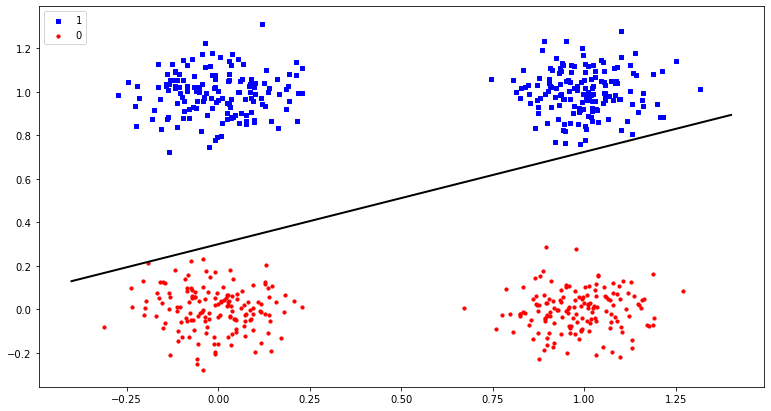

In [97]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

In [ ]:
#TODO Visualização dos resultados e discussão